In [1]:
import sys,os,glob
from astropy.io import fits
from astropy.table import Table
from astropy.nddata import extract_array
from astropy.coordinates import SkyCoord
from astropy import wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from astropy.visualization import (simple_norm,LinearStretch)

import jhat
from jhat import jwst_photclass,st_wcs_align

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-055 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-059
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    


In [36]:
obs_table1 = Observations.query_criteria(obs_id='jw01069-c1000_t002_nircam_clear-f200w')
data_products_by_obs = Observations.get_product_list(obs_table1)
data_products_by_obs = data_products_by_obs[data_products_by_obs['calib_level']==2]
data_products_by_obs = data_products_by_obs[data_products_by_obs['productSubGroupDescription']=='CAL'][0]
Observations.download_products(data_products_by_obs,extension='fits')

<Table length=1>
                                         Local Path                                          ...  URL  
                                           str92                                             ... object
-------------------------------------------------------------------------------------------- ... ------
./mastDownload/JWST/jw01069002002_06101_00001_nrca1/jw01069002002_06101_00001_nrca1_cal.fits ...   None

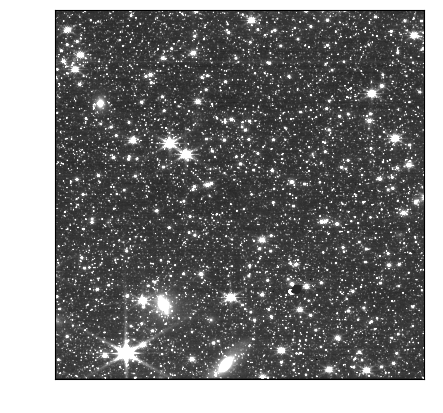

In [2]:
ref_image = glob.glob('mastDownload/JWST/*nrca1*/*cal.fits')[0]

ref_fits = fits.open(ref_image)
ref_data = fits.open(ref_image)['SCI',1].data
norm1 = simple_norm(ref_data,stretch='linear',min_cut=-.5,max_cut=3)

plt.imshow(ref_data, origin='lower',
                      norm=norm1,cmap='gray')
plt.gca().tick_params(labelcolor='none',axis='both',color='none')
plt.show()

2022-12-15 12:56:17,063 - stpipe.SourceCatalogStep - INFO - SourceCatalogStep instance created.
2022-12-15 12:56:18,023 - stpipe.SourceCatalogStep - INFO - Using APCORR reference file: /grp/crds/cache/references/jwst/jwst_nircam_apcorr_0004.fits
2022-12-15 12:56:18,041 - stpipe.SourceCatalogStep - INFO - Using ABVEGAOFFSET reference file: /grp/crds/cache/references/jwst/jwst_nircam_abvegaoffset_0001.asdf
2022-12-15 12:56:18,042 - stpipe - INFO - Instrument: NIRCAM
2022-12-15 12:56:18,042 - stpipe - INFO - Detector: NRCA1
2022-12-15 12:56:18,043 - stpipe - INFO - Filter: F200W
2022-12-15 12:56:18,043 - stpipe - INFO - Pupil: CLEAR
2022-12-15 12:56:18,044 - stpipe - INFO - Subarray: FULL
2022-12-15 12:56:18,104 - stpipe - WARNING - model.meta.resample.pixel_scale_ratio was not found. Assuming the native detector pixel scale (i.e., pixel_scale_ratio = 1)
2022-12-15 12:56:40,844 - stpipe - INFO - Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Number of stars: 1269
### NO propoer motion correction!!!
Number of stars after removing nan's: 1269
*** Note: close plot to continue!


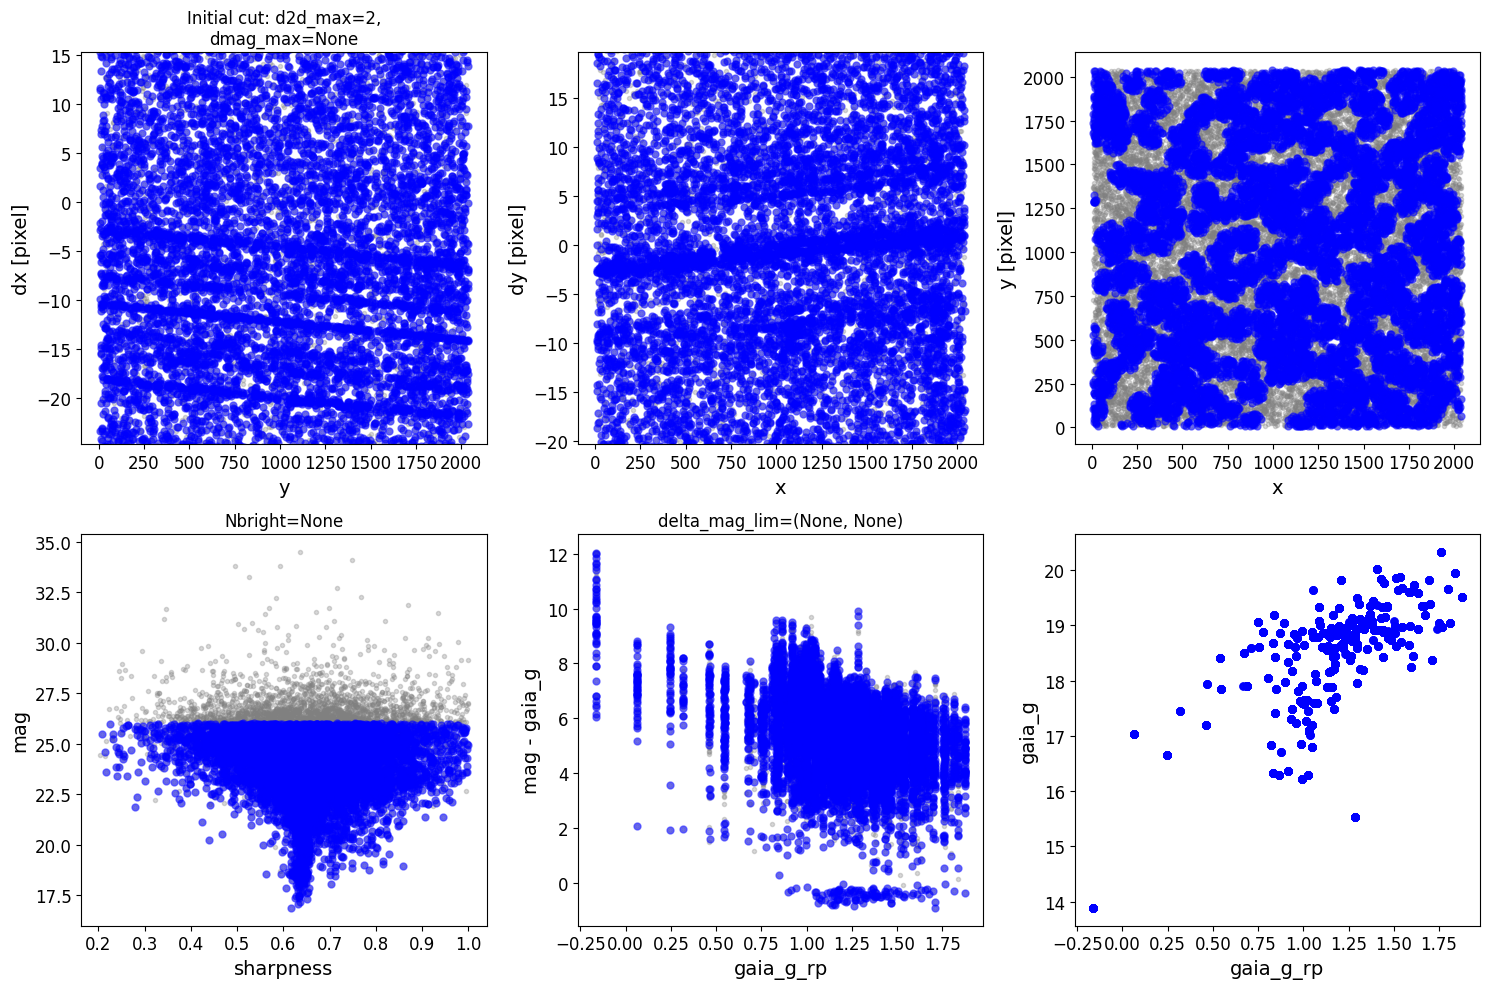

        slope     intercept     maxval  index  d_bestguess  fwhm  multimax
-4.882812e-03  5.000000e+00 157.855795    306    -7.117054  30.8     False
-4.833984e-03  4.950000e+00 160.225193    306    -7.072531  30.4     False
-4.785156e-03  4.900000e+00 158.926180    307    -6.828008  30.6     False
-4.736328e-03  4.850000e+00 161.519953    306    -6.983485  30.6     False
-4.687500e-03  4.800000e+00 159.656532    306    -6.938962  30.4     False
-4.638672e-03  4.750000e+00 160.429668    305    -7.094439  24.2     False
-4.589844e-03  4.700000e+00 161.788233    305    -7.049916  30.2     False
-4.541016e-03  4.650000e+00 160.519761    305    -7.005393  30.2     False
-4.492188e-03  4.600000e+00 160.049742    305    -6.960870  30.2     False
-4.443359e-03  4.550000e+00 158.492439    305    -6.916347  30.4     False
-4.394531e-03  4.500000e+00 156.334945    304    -7.071824  30.4     False
-4.345703e-03  4.450000e+00 157.144638    310    -5.827301  22.0     False
-4.296875e-03  4.400000e+

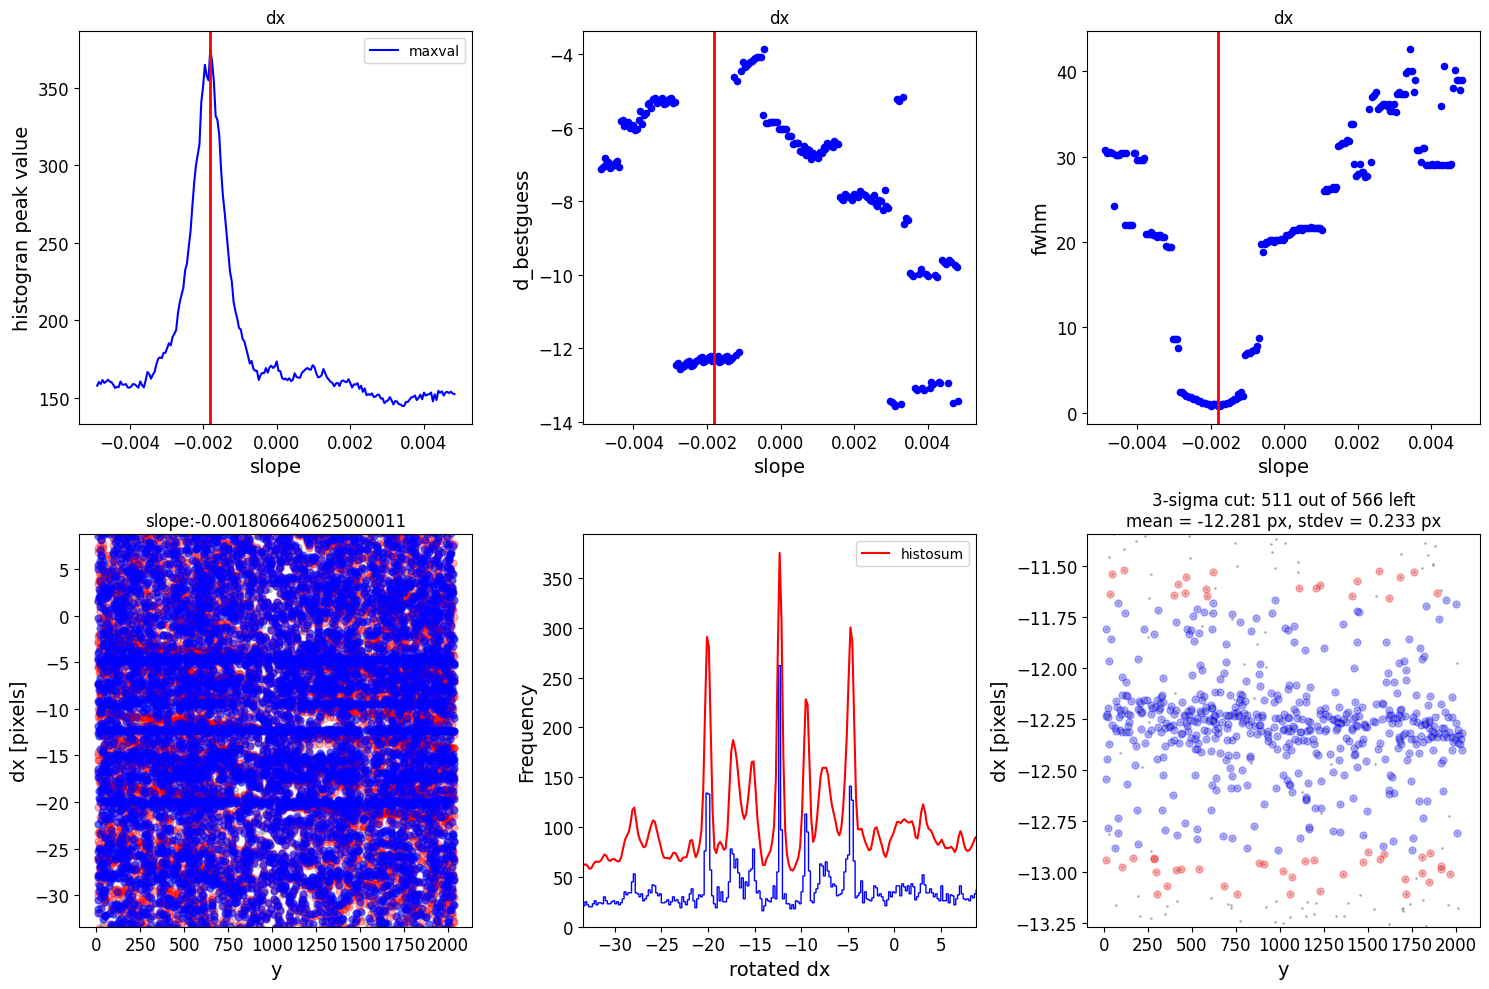

        slope     intercept     maxval  index  d_bestguess  fwhm  multimax
-4.882812e-03  5.000000e+00  19.561716    345     5.023896   8.8     False
-4.833984e-03  4.950000e+00  19.496964    317    -0.553635   8.6     False
-4.785156e-03  4.900000e+00  18.668993    345     5.068834   8.8     False
-4.736328e-03  4.850000e+00  19.114754    345     5.091303   8.8     False
-4.687500e-03  4.800000e+00  19.557705    344     4.913772   8.6     False
-4.638672e-03  4.750000e+00  18.693251    344     4.936242   8.6     False
-4.589844e-03  4.700000e+00  19.923259    344     4.958711   8.6     False
-4.541016e-03  4.650000e+00  19.426171    343     4.781180   8.4     False
-4.492188e-03  4.600000e+00  19.569738    316    -0.596351   8.4     False
-4.443359e-03  4.550000e+00  19.801728    342     4.626118   8.4     False
-4.394531e-03  4.500000e+00  19.621678    342     4.648588   8.2     False
-4.345703e-03  4.450000e+00  19.478698    341     4.471057   8.2     False
-4.296875e-03  4.400000e+

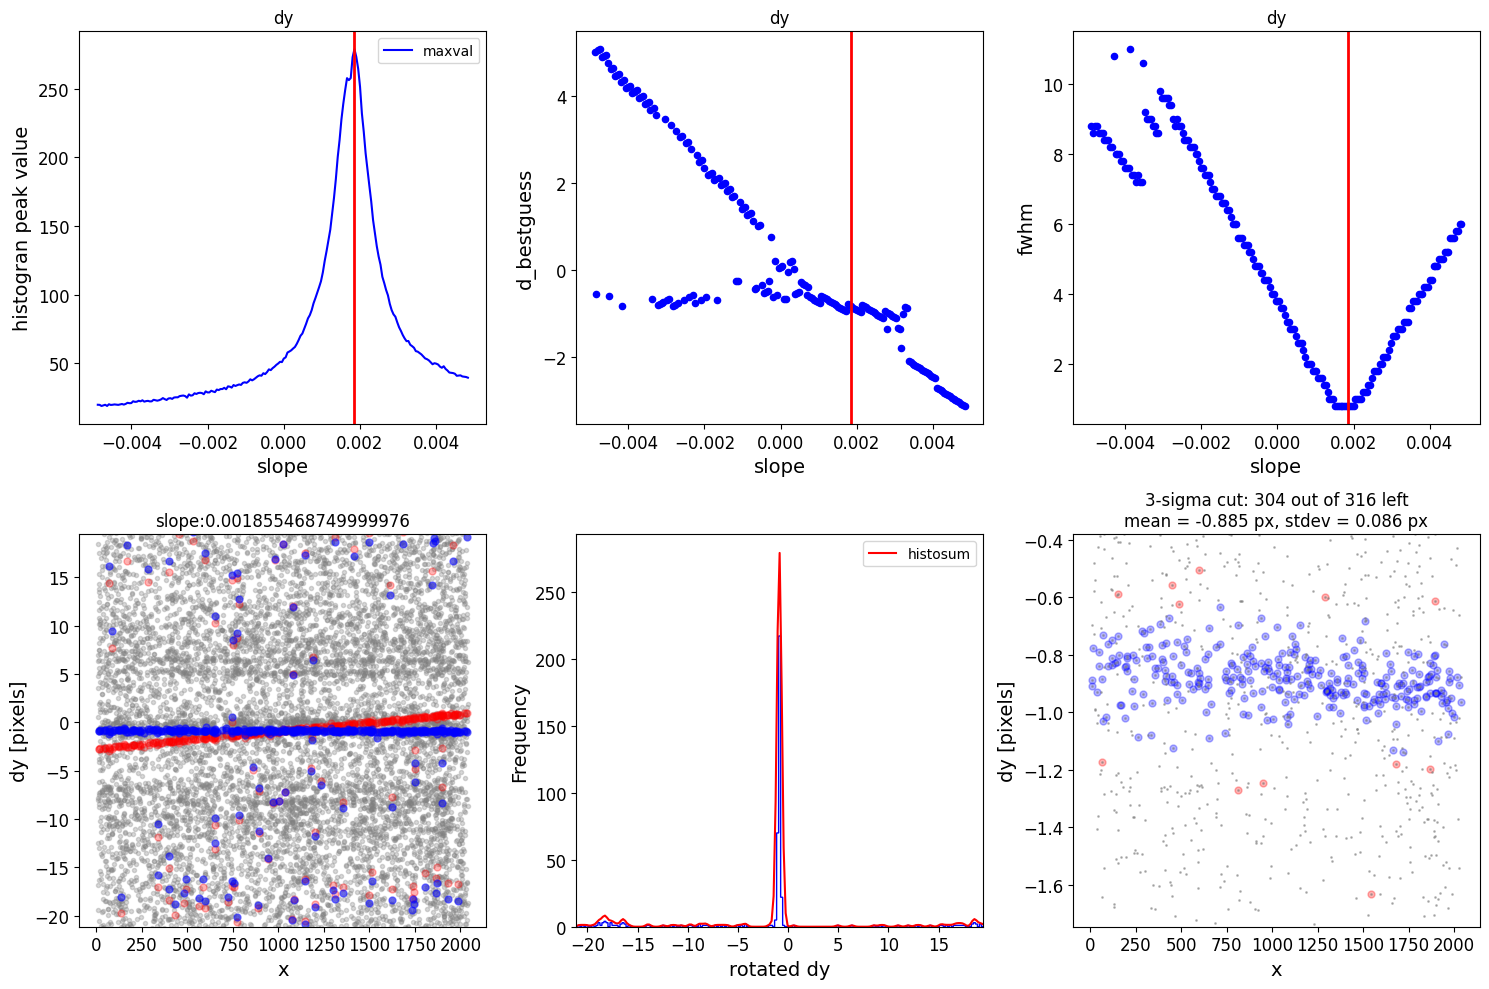

*** Note: close plots to continue!


<Figure size 640x480 with 0 Axes>

2022-12-15 12:56:47,695 - stpipe.JwstStep - INFO - JwstStep instance created.
2022-12-15 12:56:48,024 - stpipe.JwstStep - INFO - Step JwstStep running with args ([<ImageModel(2048, 2048) from jw01069002002_06101_00001_nrca1_cal.fits>],).
2022-12-15 12:56:48,027 - stpipe.JwstStep - INFO - Step JwstStep parameters are: {'output_file': '/Users/jpierel/CodeBase/jhat/notebooks/mastDownload/jw01069002002_06101_00001_nrca1_tweakregstep.fits', 'output_dir': './mastDownload', 'output_ext': '.fits', 'output_use_model': False, 'save_results': True, 'skip': False, 'suffix': None, 'input_dir': '', 'save_catalogs': False, 'snr_threshold': 50, 'brightest': 4000, 'enforce_user_order': True, 'minobj': 4, 'searchrad': 0.5, 'separation': 9, 'tolerance': 0.7, 'xoffset': 0, 'yoffset': 0, 'fitgeometry': 'rshift', 'nclip': 3, 'sigma': 3.0, 'align_to_gaia': False, 'gaia_catalog': 'GAIADR2', 'min_gaia': 30, 'save_gaia_catalog': False, 'pre_hooks': [], 'post_hooks': [], 'output_use_index': True, 'search_output_

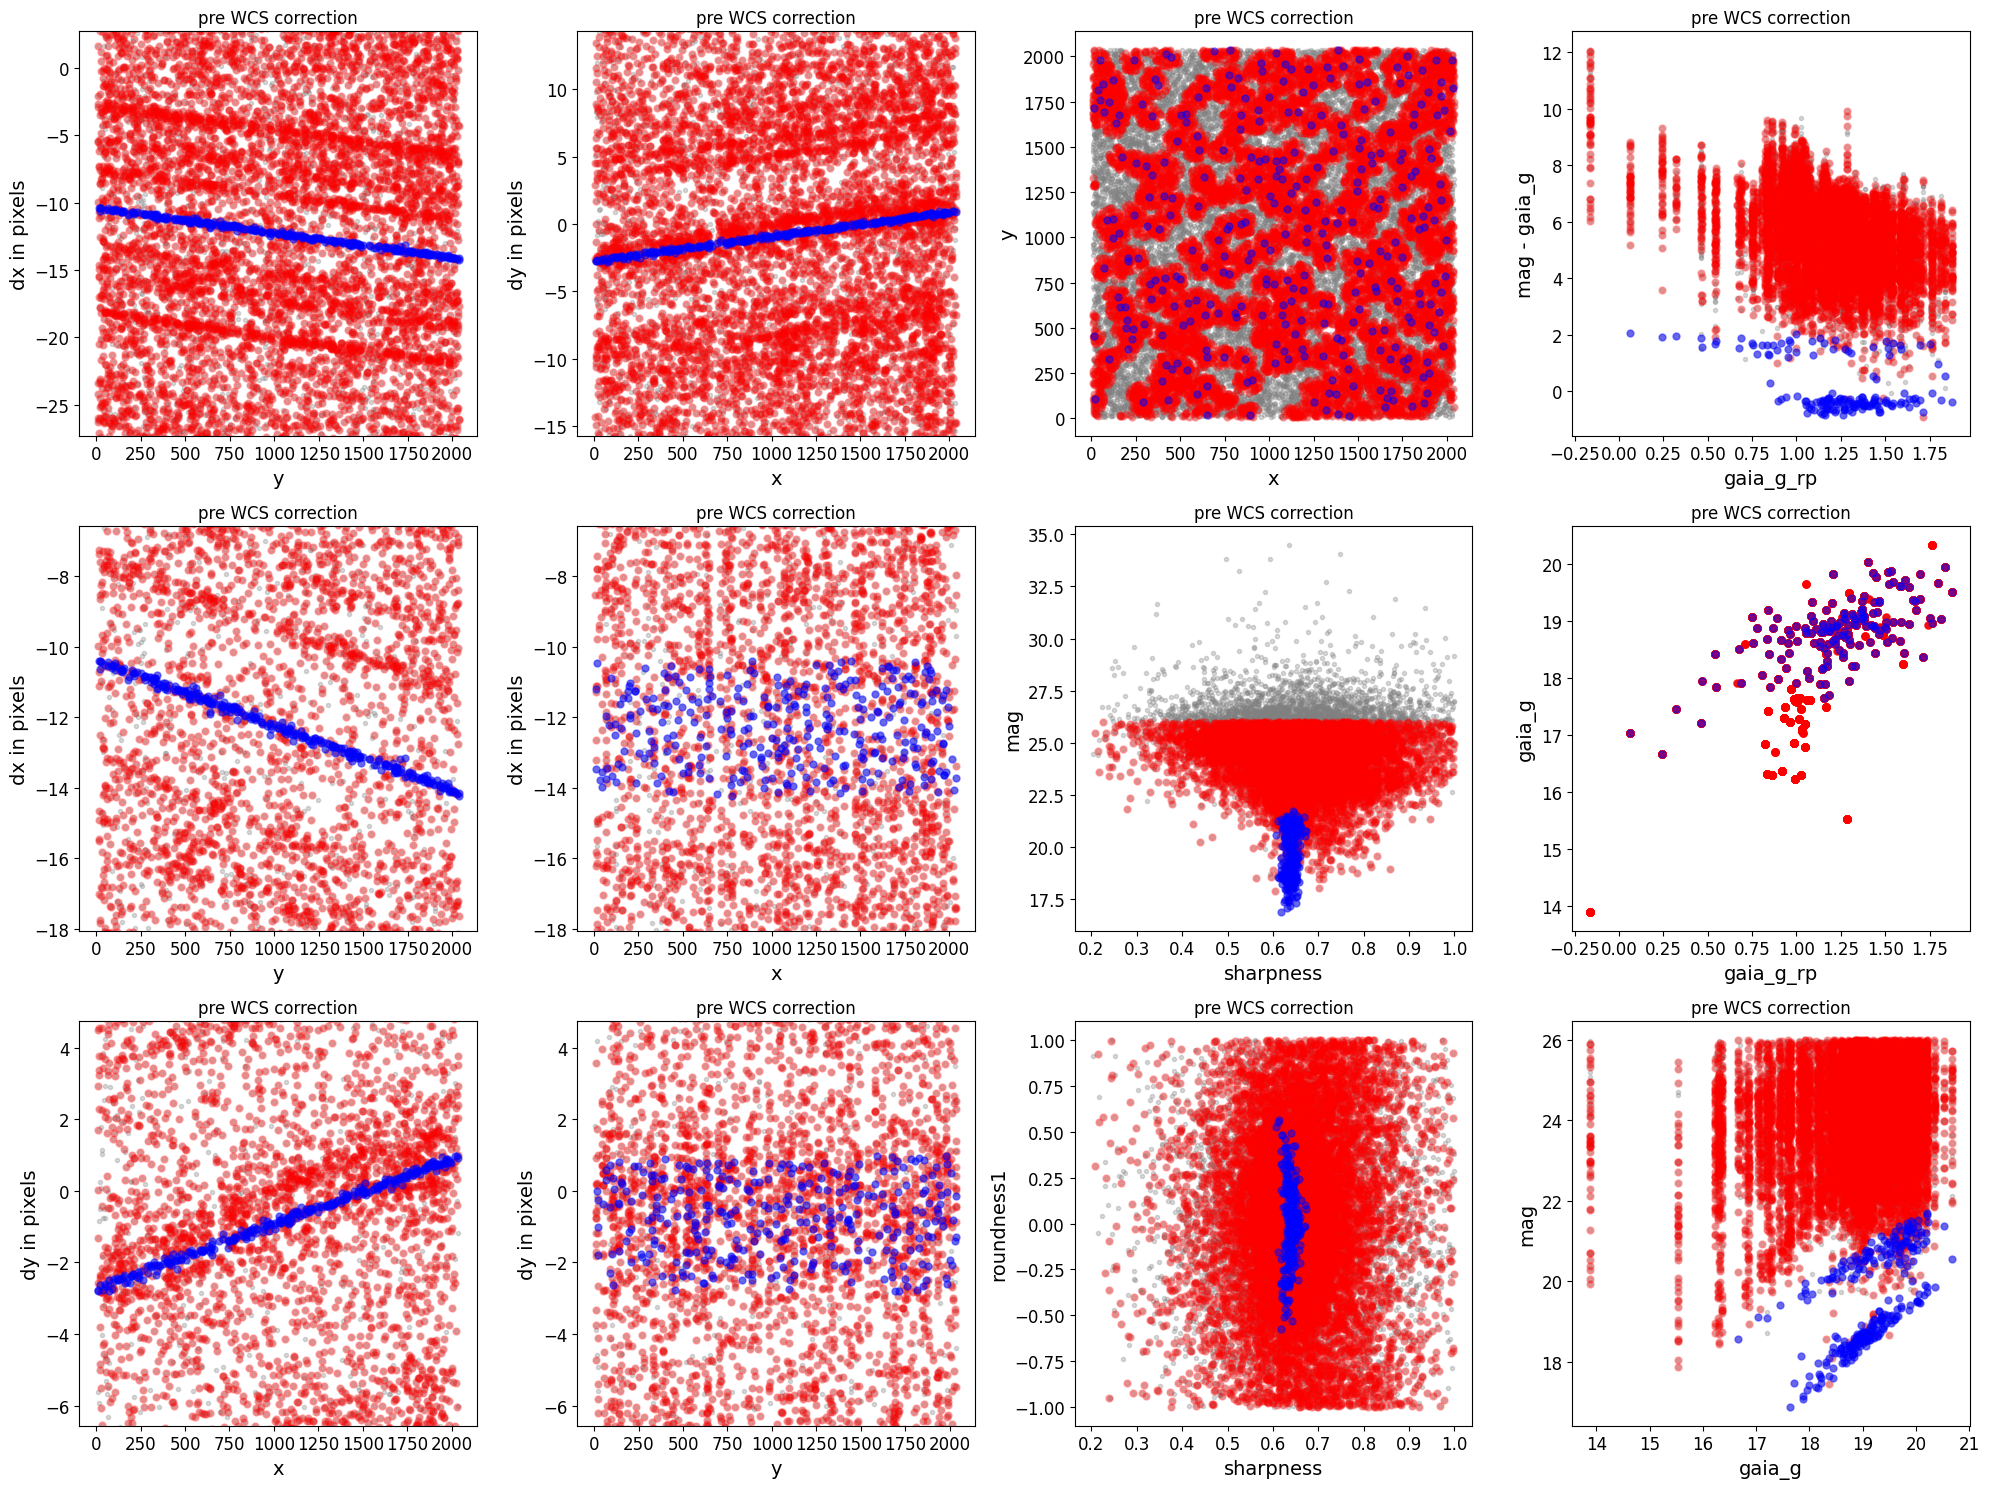

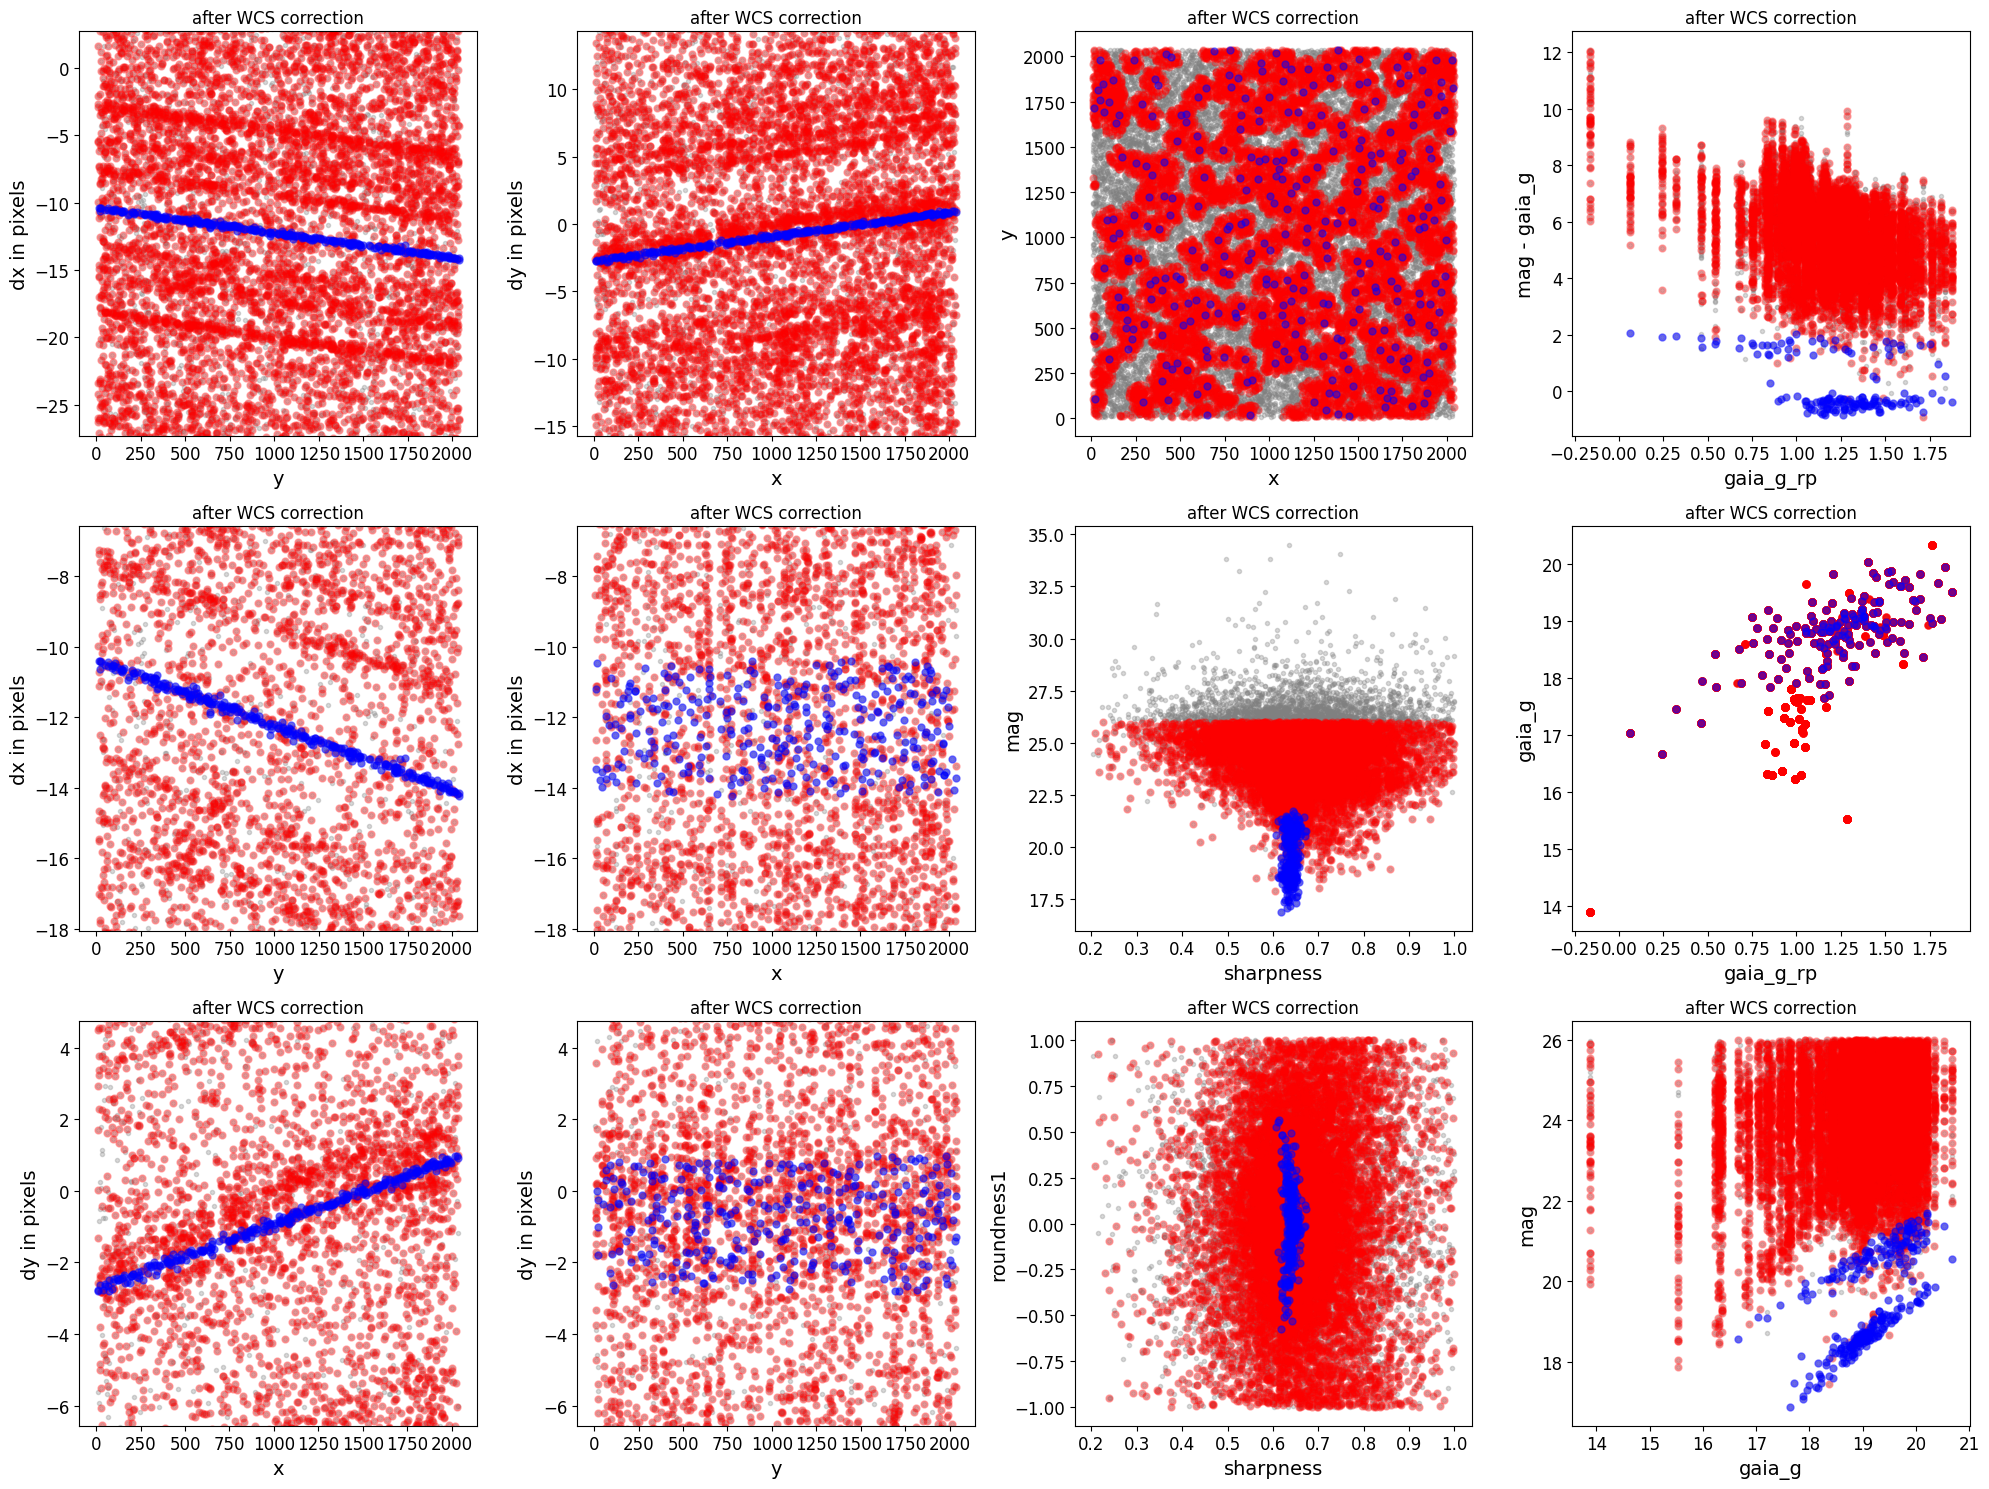

*** Note: close plots to continue!


0

In [3]:
wcs_align = st_wcs_align()
wcs_align.run_all(ref_image,
              telescope='jwst',
              outsubdir='mastDownload',
          overwrite=True,
          d2d_max=2,
          showplots=2,
          verbose=0,
          refcatname='Gaia',
          histocut_order='dxdy',
              sharpness_lim=(0,10),
              roundness1_lim=(-10, 10),
              SNR_min= 3,
              objmag_lim =(10,26))
